<a href="https://colab.research.google.com/github/Haaz123/US-Oil-Prices-Basic-Prediction/blob/main/Gas_Price_Prediction_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Monthly oil prices.csv")

In [3]:
data.head(2)

,Date,Monthly Prices
0,Apr-1993,1.078
1,May-1993,1.100


In [4]:
n_data = data.rename(columns={'Monthly Prices' : 'Prices'}, inplace=False)

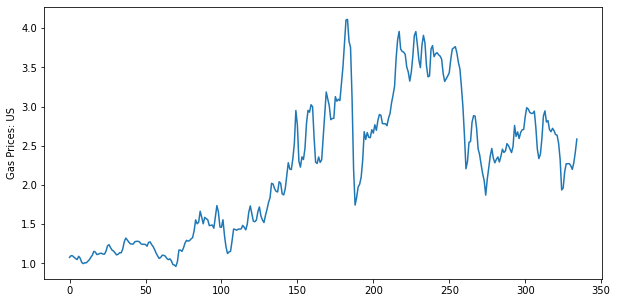

In [5]:
# Setting the text on the Y-axis
plt.ylabel("Gas Prices: US")

# Setting the size of our graph
n_data.Prices.plot(figsize=(10,5))

In [6]:
n_data[["Month", "Year"]]= n_data.Date.str.split('-', expand=True)

In [7]:
n_data = n_data.drop(columns=["Date"])

In [8]:
n_data.head()

,Prices,Month,Year
0,1.078,Apr,1993
1,1.100,May,1993
2,1.097,Jun,1993
3,1.078,Jul,1993
4,1.062,Aug,1993


In [9]:
data_n = n_data.copy()

In [10]:
month = {"Jan" : 1, 'Feb' : 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug' : 8, 'Sep': 9, 'Oct': 10, 'Nov' : 11, 'Dec': 12}

In [11]:
data_n = data_n.dropna(axis=0)

In [12]:
d = data_n.Month.replace(to_replace=month, value = None)

In [13]:
data_n["Month"] = d.astype(str)

In [14]:
data_n

,Prices,Month,Year
0,1.078,4,1993
1,1.100,5,1993
2,1.097,6,1993
3,1.078,7,1993
4,1.062,8,1993
...,...,...,...
330,2.248,10,2020
331,2.200,11,2020
332,2.284,12,2020
333,2.420,1,2021


In [15]:
data_n['Date'] = "01" +  data_n["Month"] +  data_n["Year"]

In [16]:
data_n = data_n.drop(["Month", "Year"], axis= 1)

In [17]:
data_n["Date"] = data_n["Date"].astype(str)

In [18]:
data_n['Date'] =  pd.to_datetime(data_n["Date"],errors='raise', format =  '%m%d%Y')


In [19]:
data_n.head()

,Prices,Date
0,1.078,1993-01-04
1,1.100,1993-01-05
2,1.097,1993-01-06
3,1.078,1993-01-07
4,1.062,1993-01-08


In [20]:
data_n['MA3'] = data_n['Prices'].shift(1).rolling(window=3).mean()
data_n['MA9']= data_n['Prices'].shift(1).rolling(window=9).mean()

In [21]:
data_n.head()

,Prices,Date,MA3,MA9
0,1.078,1993-01-04,NaN,NaN
1,1.100,1993-01-05,NaN,NaN
2,1.097,1993-01-06,NaN,NaN
3,1.078,1993-01-07,1.091667,NaN
4,1.062,1993-01-08,1.091667,NaN


In [22]:
data_n = data_n.set_index("Date")

In [23]:
# Dropping the NaN values
data_n = data_n.dropna()

# Initialising X and assigning the two feature variables
X = data_n[['MA3','MA9']]

# Getting the head of the data
X.head()



,MA3,MA9
Date,,
1994-01-01,1.057333,1.070778
1994-01-02,1.026000,1.061889
1994-01-03,1.007000,1.051778
1994-01-04,1.005000,1.041889
1994-01-05,1.014667,1.036222


In [24]:
Y = pd.DataFrame(data_n['Prices'])

In [25]:
#Y= pd.DataFrame(Y)

In [26]:
Y

,Prices
Date,
1994-01-01,0.998
1994-01-02,1.009
1994-01-03,1.008
1994-01-04,1.027
1994-01-05,1.047
...,...
2020-01-10,2.248
2020-01-11,2.200
2020-01-12,2.284


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

In [29]:
model = LinearRegression().fit(X_train,y_train)

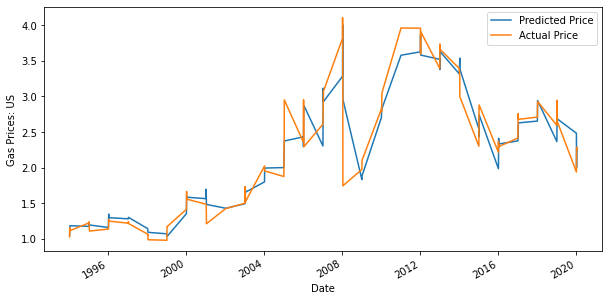

In [30]:

predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Prices'])


ax = predicted_price.plot(figsize=(10,5))
y_test.plot(ax=ax)
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Gas Prices: US")
plt.show()

In [31]:
# Computing the accuracy of our model
R_squared_score = model.score(X_test,y_test)*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 91.96% accuracy.


In [32]:
print("Real Price : %5f, Predicted : %5f" % (y_test.iloc[25], predicted_price.iloc[25]))


Real Price : 2.880000, Predicted : 2.741368
